In [101]:
import pandas
import matplotlib.pyplot as plot
import numpy as py
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [102]:
Excel = pandas.read_csv("SVMdataset.csv")

In [103]:
Excel.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [104]:
x=Excel.iloc[:,:-1].values

In [105]:
y=Excel.iloc[:,2].values

In [106]:
X_train, X_1, y_train, y_1 = train_test_split(x, y, test_size=0.4,random_state=40)

In [107]:
X_test, X_v, y_test, y_v = train_test_split(X_1, y_1, train_size=0.5,random_state=40)

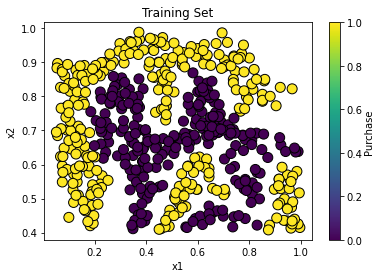

In [108]:
plot.figure()
plot.ylabel('x2')
plot.xlabel('x1')
plot.scatter(X_train[:,0],X_train[:,1],edgecolor='k',s = 100,c=y_train)
plot.title('Training Set')
cbar= plot.colorbar()
cbar.set_label("Purchase", labelpad=+1)
plot.show()

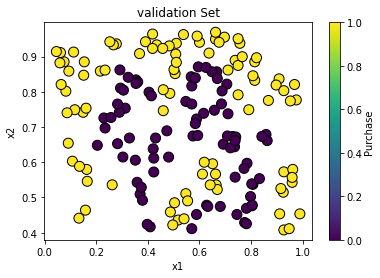

In [109]:
plot.figure()
plot.ylabel('x2')
plot.xlabel('x1')
plot.scatter(X_v[:,0],X_v[:,1],edgecolor='k',s = 100,c=y_v)
plot.title('validation Set')
cbar= plot.colorbar()
cbar.set_label("Purchase", labelpad=+1)
plot.show()

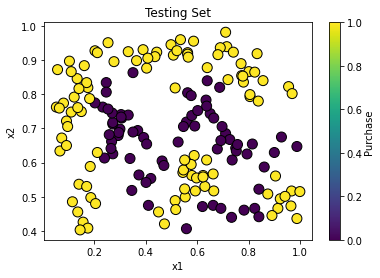

In [110]:
plot.figure()
plot.ylabel('x2')
plot.xlabel('x1')
plot.scatter(X_test[:,0],X_test[:,1],edgecolor='k',s = 100,c=y_test)
plot.title('Testing Set')
cbar= plot.colorbar()
cbar.set_label("Purchase", labelpad=+1)
plot.show()

In [111]:
mat=py.zeros(20)
q=0
j=1000
while q<20:
    mat[q]=j
    j=j/2
    q=q+1
mtx=py.zeros(20)
q=0
j=1000
while q<20:
    mtx[q]=j
    j=j/2
    q=q+1

In [112]:
b=800
b1=800
c = SVC(kernel='rbf',C =b,gamma=b1)
c.fit(X_train, y_train)
y_vp=c.predict(X_v)
bestx =metrics.f1_score(y_v,y_vp)
for i in mat:    
    for j in mtx:
        c = SVC(kernel='rbf',C =i,gamma=j)
        c.fit(X_train, y_train)
        y_vp=c.predict(X_v)
        f1 =metrics.f1_score(y_v,y_vp)
        if bestx<f1:
            bestx=f1
            b=i
            b1=i
c = SVC(kernel='rbf',C =b,gamma=b1)
c.fit(X_train, y_train)

SVC(C=3.90625, gamma=3.90625)

Training confusion matrix


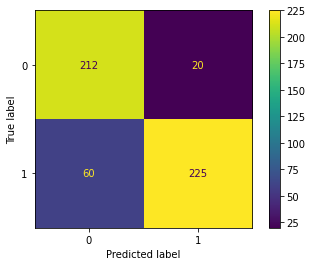

In [113]:
print("Training confusion matrix")
metrics.plot_confusion_matrix(c, X_train, y_train)

Validation confusion matrix


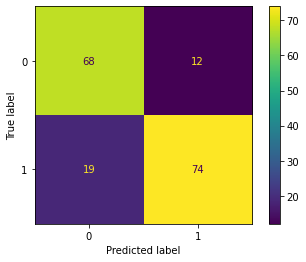

In [114]:
print('Validation confusion matrix')
metrics.plot_confusion_matrix(c, X_v, y_v)

Testing confusion matrix


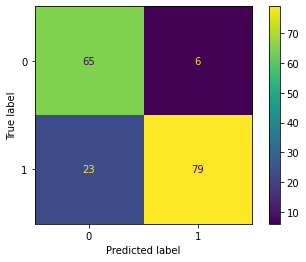

In [115]:
print("Testing confusion matrix")
metrics.plot_confusion_matrix(c, X_test, y_test)

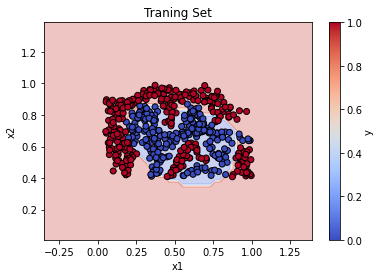

In [116]:
h = .03
x_min_t, x_max_t = X_train[:, 0].min() - 0.4, X_train[:, 0].max() + 0.4
y_min_t, y_max_t = X_train[:, 1].min() - 0.4, X_train[:, 1].max() + 0.4
r1, r2 = py.meshgrid(py.arange(x_min_t, x_max_t, h),py.arange(y_min_t, y_max_t, h))
plot.subplots_adjust(wspace=0.4, hspace=0.4)
m = c.predict(py.c_[r1.ravel(), r2.ravel()])
m = m.reshape(r1.shape)
plot.contourf(r1, r2, m, cmap=plot.cm.coolwarm, alpha=0.3)
plot.scatter(X_train[:, 0], X_train[:, 1], c=y_train,edgecolor='k', cmap=plot.cm.coolwarm)
plot.xlabel('x1')
plot.ylabel('x2')
cbar= plot.colorbar()
cbar.set_label("y", labelpad=+1)
plot.title('Traning Set')
plot.show()

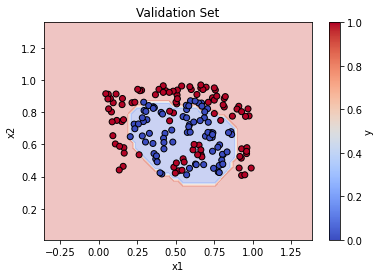

In [117]:
h = .03
x_min_t, x_max_t = X_v[:, 0].min() - 0.4, X_v[:, 0].max() + 0.4
y_min_t, y_max_t = X_v[:, 1].min() - 0.4, X_v[:, 1].max() + 0.4
r1, r2 = py.meshgrid(py.arange(x_min_t, x_max_t, h),py.arange(y_min_t, y_max_t, h))
plot.subplots_adjust(wspace=0.4, hspace=0.4)
m = c.predict(py.c_[r1.ravel(), r2.ravel()])
m = m.reshape(r1.shape)
plot.contourf(r1, r2, m, cmap=plot.cm.coolwarm, alpha=0.3)
plot.scatter(X_v[:, 0], X_v[:, 1], c=y_v,edgecolor='k', cmap=plot.cm.coolwarm)
plot.xlabel('x1')
plot.ylabel('x2')
cbar= plot.colorbar()
cbar.set_label("y", labelpad=+1)
plot.title('Validation Set')
plot.show()

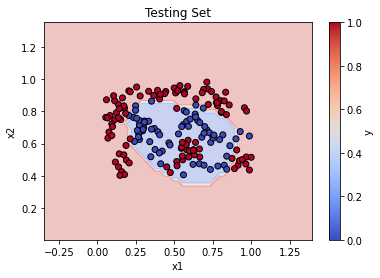

In [118]:
h = .03
x_min_t, x_max_t = X_test[:, 0].min() - 0.4, X_test[:, 0].max() +0.4
y_min_t, y_max_t = X_test[:, 1].min() - 0.4, X_test[:, 1].max() + 0.4
r1, r2 = py.meshgrid(py.arange(x_min_t, x_max_t, h),py.arange(y_min_t, y_max_t, h))
plot.subplots_adjust(wspace=0.4, hspace=0.4)
m = c.predict(py.c_[r1.ravel(), r2.ravel()])
m = m.reshape(r1.shape)
plot.contourf(r1, r2, m, cmap=plot.cm.coolwarm, alpha=0.3)
plot.scatter(X_test[:, 0], X_test[:, 1], c=y_test,edgecolor='k', cmap=plot.cm.coolwarm)
plot.xlabel('x1')
plot.ylabel('x2')
cbar= plot.colorbar()
cbar.set_label("y", labelpad=+1)
plot.title('Testing Set')
plot.show()

In [119]:
print('Trainig Set')
y_p=c.predict(X_train)
a=metrics.accuracy_score(y_train,y_p)
print("Accuracy = ",a)
r=metrics.recall_score(y_train,y_p)
print("recall = " , r)
p=metrics.precision_score(y_train,y_p)
print("Precision = ",p)
s =metrics.f1_score(y_train,y_p)
print("F1 score = ",s)

Trainig Set
Accuracy =  0.8452611218568665
recall =  0.7894736842105263
Precision =  0.9183673469387755
F1 score =  0.8490566037735849


In [120]:
print('Testing Set')
Y_predicit_test=c.predict(X_test)
a  =metrics.accuracy_score(y_test,Y_predicit_test)
print("Accuracy = ",a)
r=metrics.recall_score(y_test,Y_predicit_test)
print("recall = " , r)
p =metrics.precision_score(y_test,Y_predicit_test)
print("Precision = ",p)
score =metrics.f1_score(y_test,Y_predicit_test)
print("F1 score = ",score)

Testing Set
Accuracy =  0.8323699421965318
recall =  0.7745098039215687
Precision =  0.9294117647058824
F1 score =  0.8449197860962567


In [121]:
print('Validation')
Y_v=c.predict(X_v)
a =metrics.accuracy_score(y_v,Y_v)
print("Accuracy = ",a)
r=metrics.recall_score(y_v,Y_v)
print("recall = " , r)
p =metrics.precision_score(y_v,Y_v)
print("Precision = ",p)
score=metrics.f1_score(y_v,Y_v)
print("F1 score = ",score)

Validation
Accuracy =  0.8208092485549133
recall =  0.7956989247311828
Precision =  0.8604651162790697
F1 score =  0.8268156424581005
